# Analysing Baseball game Data
## Zsombor Hegedűs & Brúnó Helmeczy

#### Prepared for: Coding 3: Data Analysis & Management with Python 
#### Instructor: Eszter Somos 
#### MSc Business Analytics @ Central European University
#### [Github](https://github.com/zsomborh/analyse_baseball_matches) 

In [1]:
import pandas as pd
import numpy as np

In [2]:
Games = pd.read_csv("games.csv")
Atbats = pd.read_csv("atbats.csv")
Pitches = pd.read_csv("pitches.csv")

In [4]:
for df in [Games, Atbats, Pitches]:
    print(df.columns)

Index(['attendance', 'away_final_score', 'away_team', 'date', 'elapsed_time',
       'g_id', 'home_final_score', 'home_team', 'start_time', 'umpire_1B',
       'umpire_2B', 'umpire_3B', 'umpire_HP', 'venue_name', 'weather', 'wind',
       'delay'],
      dtype='object')
Index(['ab_id', 'batter_id', 'event', 'g_id', 'inning', 'o', 'p_score',
       'p_throws', 'pitcher_id', 'stand', 'top'],
      dtype='object')
Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')


In [3]:
# Games['g_id'] == Atbats['g_id']
# Pitches['ab_id'] == Atbats['ab_id']

Games = Games[['g_id','attendance','venue_name',
               'date','start_time', 'elapsed_time','delay','weather','wind',
               'away_team','home_team','away_final_score','home_final_score']]
Atbats = Atbats[['ab_id','event','g_id','inning','o','p_score','p_throws','stand','top']]
Pitches = Pitches[['ab_id','type','b_count','s_count','outs',
                   'pitch_type','pitch_num','spin_rate','start_speed','end_speed',
                   'code','zone']]

# Merge dataframes:
Pitches_n_Atbats = pd.merge(Pitches,Atbats, how = 'left')
Df_Merged = pd.merge(Pitches_n_Atbats, Games, how = 'left')

Df_Merged.columns

Df_Merged.to_csv("Baseball_Merged.csv", index = False)
# Column Descriptions:
    # ab_id       - Id of at bat
    # type        - Pitch Type: CH=Changeup, CU=Curveball, EP=Eephus*, FC=Cutter, FF=Four-seam Fastball, FO=Pitchout (or PO)
                            #  FS=Splitter, FT=2-seam Fastball, IN=Intentional ball, KC=Knuckle curve, KN=Knuckeball, 
                            #  PO=Pitchout (or FO), SC=Screwball, SI=Sinker, SL=Slider,UN=Unknown
            # Some occur rarely -> decrease factors to 3-5 most-frequent + 'Others' 
    # b_count     - Balls hit (in current round, I think)
    # s_count     - Strikes   (in current round, I think)
    # outs        - How many outs are there for the hitting team in the current inning - should be 0-2
    # pitch_type  - Should be same as type 
    # pitch_num   - Defending team can have many Nr. pitches until 3 outs are made 
    # spin_rate   - Of ball in rounds per minute (RPM
    # start_speed - Ball speed at release
    # end_speed   - Ball speed at hit 
    # code        - 
    # zone        - 
    # event       - Outcome of Pitch/Atbat - what the pitch resulted in 
    # g_id        - 
    # inning      - should be 1-9 -> Like quarters in NBA/NFL - baseball is played in 9 innings
    # o           - 
    # p_score     - 
    # p_throws    - 
    # stand       - Batter Left/Right handed stand
    # top         - Yes/No -  Innings consist of 2 halves, the "top" (first) & "bottom" (second). 
                            # In each half, one team bats until 3 outs are made, with other team playing defense. 
    # delay       - Game started late by X minutes
    # weather     - weather-description string 
    # wind        - string with windspeed inside
    # away_team
    # home_team
    # away_final_score
    # home_final_score
    # 
    # 
    # 
    



In [21]:
Df_Merged.dropna(subset = ['zone']).isna().sum()

ab_id                  0
type                   0
b_count                0
s_count                0
outs                   0
pitch_type             0
pitch_num              0
spin_rate              0
start_speed            0
end_speed              0
code                5715
zone                   0
event                  0
g_id                   0
inning                 0
o                      0
p_score                0
p_throws               0
stand                  0
top                    0
attendance             0
venue_name             0
date                   0
start_time             0
elapsed_time           0
delay                  0
weather                0
wind                   0
away_team              0
home_team              0
away_final_score       0
home_final_score       0
dtype: int64

In [29]:
Df_Merged['code'].unique()

array(['C', 'S', 'F', 'B', 'X', 'D', 'E', '*B', 'L', 'W', 'T', 'I', 'M',
       'H', 'P', 'V', 'Q', 'R', 'Unknown', 'Z'], dtype=object)

C:\Users\T450s\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\T450s\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.85605025e-05, 1.47018035e-04, 2.26246297e-04, 2.64180521e-04,
        2.71506493e-04, 2.83438742e-04, 3.32045886e-04, 4.28264614e-04,
        5.57235506e-04, 6.74590992e-04, 6.35822042e-04, 4.18402295e-04,
        1.99517354e-04, 7.44080777e-05, 2.10466908e-05, 4.71564248e-06,
        9.53743517e-07, 2.94325571e-07, 1.19016898e-07, 5.14667665e-08,
        5.46834394e-08, 1.76917010e-08, 1.44750281e-08, 9.65001872e-09,
        4.82500936e-09, 1.60833645e-09, 0.00000000e+00, 0.00000000e+00,
        1.60833645e-09, 4.82500936e-09]),
 array([1.21400000e+00, 2.19148833e+02, 4.37083667e+02, 6.55018500e+02,
        8.72953333e+02, 1.09088817e+03, 1.30882300e+03, 1.52675783e+03,
        1.74469267e+03, 1.96262750e+03, 2.18056233e+03, 2.39849717e+03,
        2.61643200e+03, 2.83436683e+03, 3.05230167e+03, 3.27023650e+03,
        3.48817133e+03, 3.70610617e+03, 3.92404100e+03, 4.14197583e+03,
        4.35991067e+03, 4.57784550e+03, 4.79578033e+03, 5.01371517e+03,
        5.23165000e+03

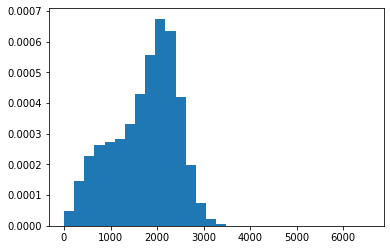

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.hist(x  = Df_Merged['spin_rate'], density = True, bins = 30)


(array([1.63024801e-07, 1.63024801e-07, 1.95629762e-06, 4.89074404e-06,
        5.70586805e-06, 7.01006646e-06, 1.20638353e-05, 1.40201329e-05,
        2.11932242e-05, 2.91814394e-05, 4.82553412e-05, 7.54804830e-05,
        1.85033149e-04, 4.24679607e-04, 1.02298063e-03, 2.70441843e-03,
        6.41176543e-03, 1.09135323e-02, 1.93184390e-02, 2.76051526e-02,
        3.95613916e-02, 4.52807907e-02, 5.66840495e-02, 7.70577479e-02,
        9.29895097e-02, 5.98517844e-02, 2.16188819e-02, 2.98791856e-03,
        2.62959004e-04, 1.51613065e-05]),
 array([32.4 , 34.55, 36.7 , 38.85, 41.  , 43.15, 45.3 , 47.45, 49.6 ,
        51.75, 53.9 , 56.05, 58.2 , 60.35, 62.5 , 64.65, 66.8 , 68.95,
        71.1 , 73.25, 75.4 , 77.55, 79.7 , 81.85, 84.  , 86.15, 88.3 ,
        90.45, 92.6 , 94.75, 96.9 ]),
 <a list of 30 Patch objects>)

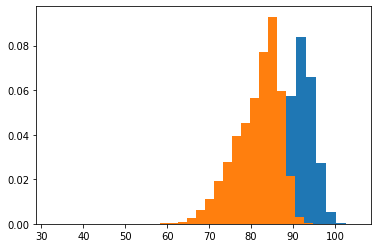

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.hist(x  = Df_Merged['start_speed'], density = True, bins = 30)
plt.hist(x  = Df_Merged['end_speed'], density = True, bins = 30)


In [14]:
Df_Merged['zone'].unique()

array([ 3.,  5.,  1., 13.,  6.,  7., 14., 11.,  9.,  2.,  8.,  4., 12.,
       nan])

In [15]:
len(Df_Merged)

2867154

## Cleaning

In [23]:
Df_Merged.dropna(subset = ['zone'], inplace = True)
Df_Merged.loc[Df_Merged['code'].isna(),['code']] = 'Unknown'
Df_Merged.isna().sum()

# TODO1: Look at extreme values 
# TODO2: Aggregate data to some levels
# TODO3: Correlations - looking at histograms
# TODO4: Add commentary for possible feature engineering